## Table of Content

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section1)<br>
3. [Loading Data and Description](#section2)<br>
4. [Pandas Profiling before Data Preprocessing](#section3)<br>
5. [Data Preprocessing](#section4)<br>
6. [Exploratory Data Analysis](#section4)<br>
    - 6.1 [Univariate Analysis](#section401)<br>
    - 6.2 [Bivariate Analysis](#section402)<br>
7. [Algorithms that will be used](#section5)<br>
8. [Preparing Data for Modelling](#section6)<br>
9. [Applying Regression Techniques](#section7)<br>
    - 9.1 [Linear Regression using Revenue(Millions)](#section401)<br>
    - 9.2 [Linear Regression using Revenue_log](#section401)<br>
    - 9.3 [Random Forest using Revenue(Millions)](#section401)<br>
    - 9.4 [Random Forest using Revenue_log](#section401)<br>
10. [Model Evaluation](#section7)<br>
11. [Feature Selection](#section7)<br>
12. [Variable Importance](#section7)<br>
13. [Prediction](#section7)<br>
14. [Conclusion](#section7)

## 1. Problem Statement

We have data on **top 1000 movies** over the past 10 years and we want to predict the revenue that any movie can generate based on few attributes like the critic rating, audience rating, runtime, etc. 

- So, here we basically encounter a regression problem as our target variable (**Revenue**) is continuous in nature.
- We need to find a mathematical relationship between Revenue and other explanatory variables such that we can have the best fit regression line for the given data which can help us in future predictions
- We can also use Random Forest Regression to predict revenue but as we know RF does not work very well with Continuous target variable so we can skip doing it.

## 2. Importing Packages

In [76]:
#loading the necessary packages
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Loading Data and Description

### Loading Data

In [149]:
movies = pd.read_csv("C:/Users/suddutta/Downloads/Term 1 data files/Term-1-master/Data/Projects/1000 movies data.csv")

In [150]:
#Visualising the data - first 5 rows
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### Data Description

In [125]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


- ```info``` function gives us the following insights into the movies dataframe:
- The data captures the **title, Genre, Description, Director, Actors, Year of release, Runtime, Audience Rating, Critic Rating, Number of votes and the Revenue generated**
- There are 1000 rows and 12 columns
- 7 columns have numeric data and 5 have object type data
- Revenue and Metascore have missing values

In [126]:
#summary statistics

movies.describe(include = 'all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",An elite military unit comprised of special op...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


```describe``` function gives us the following insights into the movies dataframe:

  - **Rank** and **Year** though are numeric columns yet they don't make any mathematical sense and will not be part of model features
  
  - **Title, Genre, Description and Actors** columns are categorical in nature
  
  
  - **Runtime_(Minutes)** seems to have a right skewed distribution
  
  
  - **Rating** ranges between 1.9 and 9 and seems to be normally distributed around mean 6.7232
  
  
  - **Revenue_(Millions)** has a pretty big right tail with outliers. Also, there are movies with 0 revenue which is kind of shocking as there can't be any movie with 0 revenue
  
  
  - **Metascore** ranges between 11 and 100 and seems to be normally distributed around mean 59 

### Features that seem suitable for prediction

- Rank, Title, Genre, Description and Year do not seem to explain a movie's revenue
- Director and Actors might have some effect on revenue but it should not be very high. They might initially have some influence which can be approximated by say advertising budget (which is not captured in our data). So, for now we won't consider Director and Actors columns in our analysis 

## 4. Pandas Profiling before Data Preprocessing

In [50]:
#Profiling of data
pre_profile = movies.profile_report(title="Movies Profile before Data Preprocessing")
pre_profile.to_file(output_file="movies_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 12
- Number of observations: 1000
- Missing cells: 1.6%


__Variables types__: 
- Numeric = 7
- Categorical = 5

<br>

- **Metascore** has **64 missing values**.


- **Revenue_(Millions)** has **128 missing values** and one movie with 0 revenue.


- **Rank** is **unique with no missing values** and hence can be used as index.


- **Title** has **999 distinct values** with 'The Host' movie appearing twice but there are 1000 movies. So we need to check if there are any duplicate movies.


- There are **996 distinct actor groups** in the colleced dataset.


- There are **207 distinct** genre combinations.


- **644** unique directors' movies have been collected with Ridley Scott's 8 movies making it in top 1000.

## 5. Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset first, to make the data usable for **EDA**.

In [127]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


From Pre profiling, we found that:
- **Rank** is **unique with no missing values** and hence can be used as index.

- **Title** has **999 distinct values** but there are 1000 movies. So we need to check if there are any duplicate movies.

- **Metascore** has **64 missing values**.

- **Revenue_(Millions)** has **128 missing values**.

Will take each of the above observations and work on them to make the data ready for further analysis

In [139]:
#Using Rank as new index for our dataset

movies.set_index('Rank', inplace= True)

In [140]:
#Checking for duplicate movies in Title column

movies[movies.Title == 'The Host']

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
240,The Host,"Action,Adventure,Romance",When an unseen enemy threatens mankind by taki...,Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0


*The movie name is same but all other attributes are different suggesting that the 2 movies are actually different*. <br>
                Hence, there is no processing required here

In [141]:
#Let's check the metascore column. It has 64 missing values

movies.Metascore.value_counts() #metascore value has integer type data that is no float values

66.0     25
72.0     25
68.0     25
64.0     24
57.0     23
51.0     22
65.0     22
48.0     21
81.0     21
76.0     21
56.0     20
53.0     20
58.0     20
60.0     19
59.0     19
63.0     19
74.0     17
47.0     17
69.0     17
42.0     17
55.0     17
79.0     16
39.0     16
46.0     16
62.0     16
71.0     15
52.0     15
49.0     15
67.0     15
73.0     14
         ..
75.0      8
32.0      7
30.0      7
86.0      7
23.0      6
27.0      6
90.0      5
96.0      4
18.0      4
87.0      4
29.0      4
93.0      3
28.0      3
89.0      3
95.0      3
22.0      3
94.0      3
24.0      2
92.0      2
26.0      2
25.0      2
99.0      1
15.0      1
100.0     1
98.0      1
91.0      1
20.0      1
19.0      1
16.0      1
11.0      1
Name: Metascore, Length: 84, dtype: int64

In [151]:
#we can impute the missing values using mode of the Metascore column
mode = movies.Metascore.mode()
mode
#there are 3 mode values. Hence we can impute with anyone. Here we choose 68 which is between 66 and 72

0    66.0
1    68.0
2    72.0
dtype: float64

In [152]:
movies.Metascore = movies.Metascore.fillna(mode[0])

In [153]:
movies.Metascore.isnull().sum()

0

*Metascore column has been imputed by one of the mode values* <br> There are no more missing values in that column

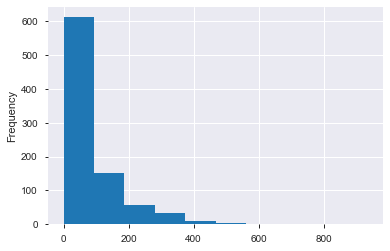

In [155]:
#Imputing missing values of Revenue column. It has 128 missing values and is also right skewed.
#plotting revenue to see its distribution

movies['Revenue (Millions)'].plot(kind = 'hist')

**Since Revenue is right skewed we use median to impute the missing values**

In [156]:
movies['Revenue (Millions)'].fillna(movies['Revenue (Millions)'].median(),inplace = True)

In [157]:
movies['Revenue (Millions)'].isnull().sum()

0

*Revenue column has been imputed by median* <br> There are no more missing values in that column

In [158]:
#Movie which has 0 Revenue
movies[movies['Revenue (Millions)'] == 0]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
231,232,A Kind of Murder,"Crime,Drama,Thriller","In 1960s New York, Walter Stackhouse is a succ...",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.2,3305,0.0,50.0


**Dropping this movie**. This is 0 may be because at the time when the data was collected there was no data on revenue available.

In [159]:
#dropping this movie

movies = movies[movies['Revenue (Millions)'] != 0]

**ALL PROCESSING HAS BEEN DONE BASED ON PROFILE REPORT**

## 6. EXPLORATORY DATA ANALYSIS

In [160]:
#snapshot of the first few rows
movies.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


**We will explore the Runtime, rating, votes, metascore and Revenue columns for model formation**

## 6.1 UNIVARIATE ANALYSIS

Here we are first doing univariate analysis on the data

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016]),
 <a list of 9 Text yticklabel objects>)

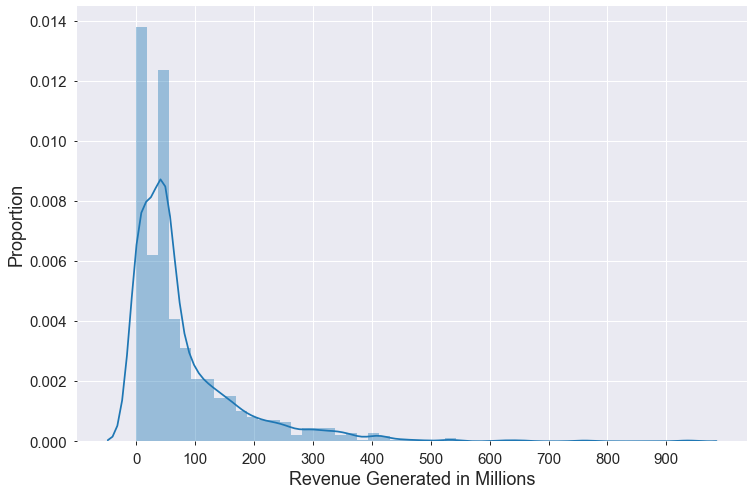

In [161]:
#Visualising the Target Variable (Revenue)
plt.figure(figsize = (12,8))
sns.distplot(movies['Revenue (Millions)'], kde = True)
plt.xticks(np.arange(0,1000, step = 100))
plt.xlabel("Revenue Generated in Millions", size= 18)
plt.ylabel("Proportion", size = 18)
plt.xticks(size = 15)
plt.yticks(size = 15)

- **Revenue** is right skewed. Most movies have generated revenues within 50 millions. 
- Very few movies have generated revenues more than 300 millions
- There are movies which have also generated 0 revenue. We need to find those movies and check if we can drop them or not

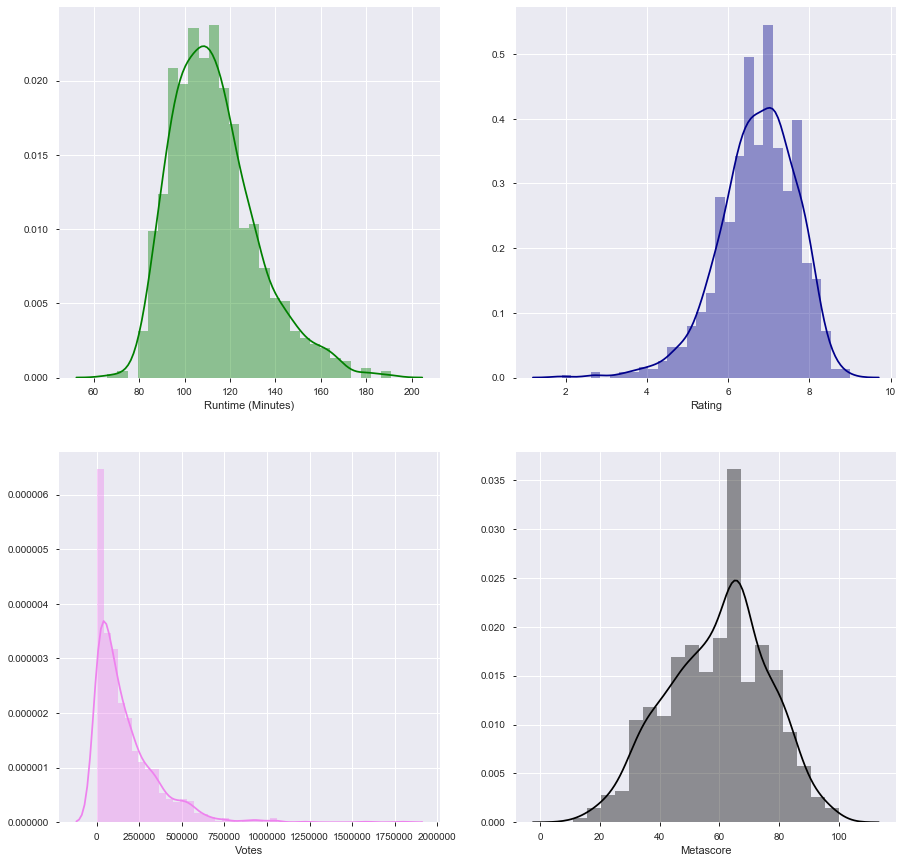

In [359]:
#Visualising the explanatory variables

f,ax = plt.subplots(2,2, figsize = (15,15))

sns.distplot(movies['Runtime (Minutes)'], ax =ax[0,0], color='green')
sns.distplot(movies['Rating'], ax =ax[0,1], color='darkblue')
sns.distplot(movies['Votes'], ax =ax[1,0], color = 'violet')
sns.distplot(movies['Metascore'], ax =ax[1,1], color = 'black')

- **Runtime** and **Metascore** seem to be normally distributed
- **Rating** has a slightly left skewed distribution
- **Votes** is highly right skewed like Revenue

**Linear Regression needs the Target Variable to be approximately normally distribute**. However, here we see that Revenue is right skewed as there are outliers. Linear regression is severely affected by outliers. Hence, we need to make it normal. We can apply logarithmic or square root transformation to make it normal.

**```Note```**: For Least Squares we do not need the normality assumption but for testing of hypothesis normality assumption is a must. However, since outliers influence the linear regression we need to fix it and in doing so we can make the Target variable normally distributed

### TRANSFORMING THE TARGET VARIABLE SINCE IT IS SKEWED

In [202]:
movies['Revenue_log'] = movies['Revenue (Millions)'].apply(np.log)
movies['Revenue_log'].describe()

count    999.000000
mean       3.378549
std        2.007186
min       -4.605170
25%        2.862485
50%        3.870888
75%        4.599690
max        6.842288
Name: Revenue_log, dtype: float64

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text yticklabel objects>)

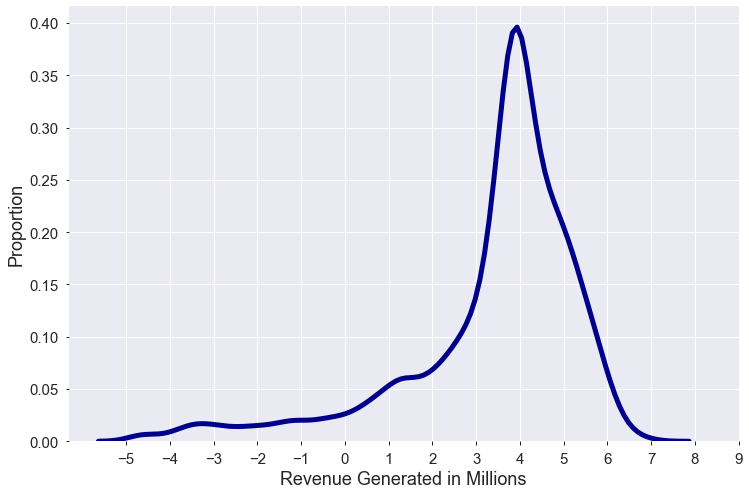

In [367]:
#Visualising the newly created Revenue column
plt.figure(figsize = (12,8))
sns.distplot(movies['Revenue_log'], hist = False, color= 'darkblue', kde_kws={'lw': 5})
plt.xticks(np.arange(-5,10, step = 1))
plt.xlabel("Revenue Generated in Millions", size= 18)
plt.ylabel("Proportion", size = 18)
plt.xticks(size = 15)
plt.yticks(size = 15)

**This seems to be more normal than before** but still is not normal and now it is left skewed

#### HIGHEST REVENUE GENERATING MOVIE IS``` STAR WARS:EPISODE VII- THE FORCE AWAKENS```

In [349]:
movies[movies['Revenue (Millions)'] == movies['Revenue (Millions)'].max()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Revenue_log
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,6.842288


#### HIGHEST AUDIENCE RATED MOVIE IS ```THE DARK KNIGHT```

In [353]:
movies[movies['Rating'] == movies['Rating'].max()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Revenue_log
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,6.279122


#### HIGHEST CRITIC RATED MOVIE IS ```BOYHOOD```

In [351]:
movies[movies['Metascore'] == movies['Metascore'].max()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Revenue_log
656,657,Boyhood,Drama,"The life of Mason, from early childhood to his...",Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014,165,7.9,286722,25.36,100.0,3.233173


#### HIGHEST VOTED MOVIE IS ```THE DARK KNIGHT```

In [352]:
movies[movies['Votes'] == movies['Votes'].max()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Revenue_log
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,6.279122


## 6.2 BIVARIATE ANALYSIS

We will look at scatterplot, correlation plots to assess the relationship between our target and explanatory variables

In [205]:
#creating a subset of the movies data. Data which will be further used in modelling

df = movies.iloc[:,7:]

In [179]:
df.head()

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Revenue_log
0,121,8.1,757074,333.13,76.0,5.808533
1,124,7.0,485820,126.46,65.0,4.839926
2,117,7.3,157606,138.12,62.0,4.928123
3,108,7.2,60545,270.32,59.0,5.599606
4,123,6.2,393727,325.02,40.0,5.783887


### Relationship between Revenue_log and other explanatory variables

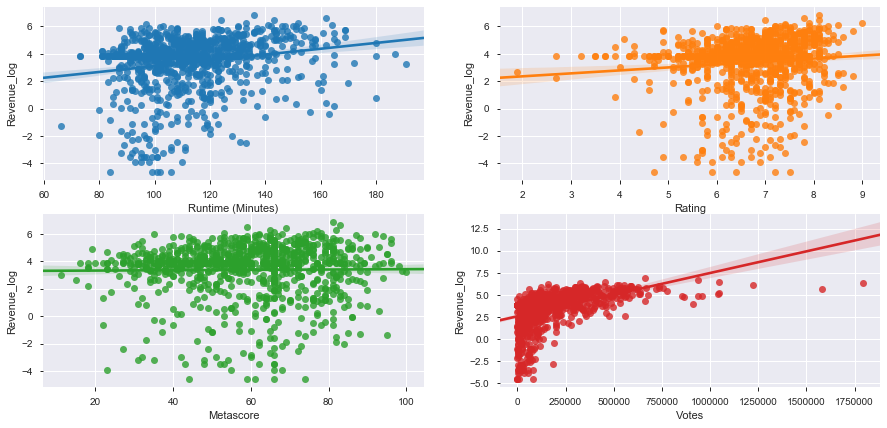

In [206]:
f,ax = plt.subplots(2,2, figsize = (15,7))
sns.regplot(x='Runtime (Minutes)', y = 'Revenue_log', data = df, ax = ax[0,0])
sns.regplot(x='Rating', y = 'Revenue_log', data = df, ax = ax[0,1])
sns.regplot(x='Metascore', y = 'Revenue_log', data = df, ax= ax[1,0])
sns.regplot(x='Votes', y = 'Revenue_log', data = df, ax=ax[1,1])

- **Runtime** and **Rating** seem to be positively correlated with Revenue_log
- **Votes** seem to also have a positive kind of relationship with Revenue_log
- **Relationship with Metascore** is not linear. Seems to be a very weak relationship

### Relationship between Revenue (Millions) and other explanatory variables

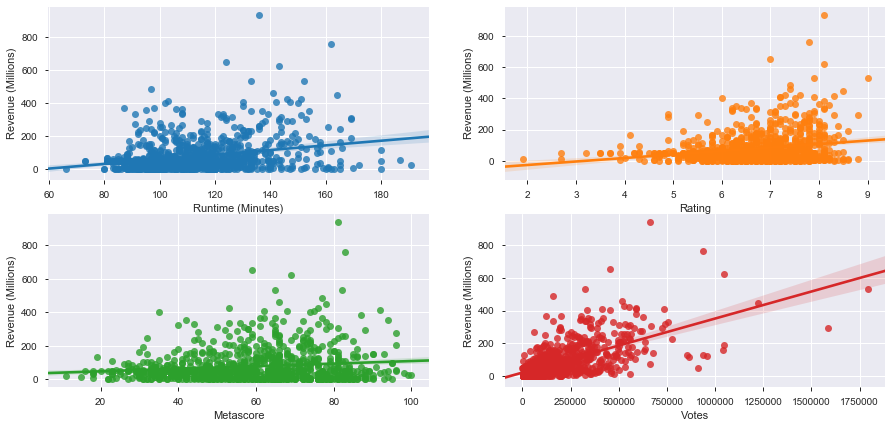

In [209]:
f,ax = plt.subplots(2,2, figsize = (15,7))
sns.regplot(x='Runtime (Minutes)', y = 'Revenue (Millions)', data = df, ax = ax[0,0])
sns.regplot(x='Rating', y = 'Revenue (Millions)', data = df, ax = ax[0,1])
sns.regplot(x='Metascore', y = 'Revenue (Millions)', data = df, ax= ax[1,0])
sns.regplot(x='Votes', y = 'Revenue (Millions)', data = df, ax=ax[1,1])

- **Runtime** and **Rating** seem to be positively correlated with Revenue (Millions)
- **Votes** seem to also have a positive kind of relationship with Revenue (Millions)
- **Relationship with Metascore** is not linear. Seems to be a very weak relationship

### Correlation and Heat Map

In [207]:
df.corr()

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Revenue_log
Runtime (Minutes),1.000000,0.391347,0.406556,0.272389,0.198650,0.198678
Rating,0.391347,1.000000,0.510977,0.217497,0.599008,0.101973
Votes,0.406556,0.510977,1.000000,0.638502,0.304730,0.461734
Revenue (Millions),0.272389,0.217497,0.638502,1.000000,0.131790,0.627476
Metascore,0.198650,0.599008,0.304730,0.131790,1.000000,0.010543
Revenue_log,0.198678,0.101973,0.461734,0.627476,0.010543,1.000000


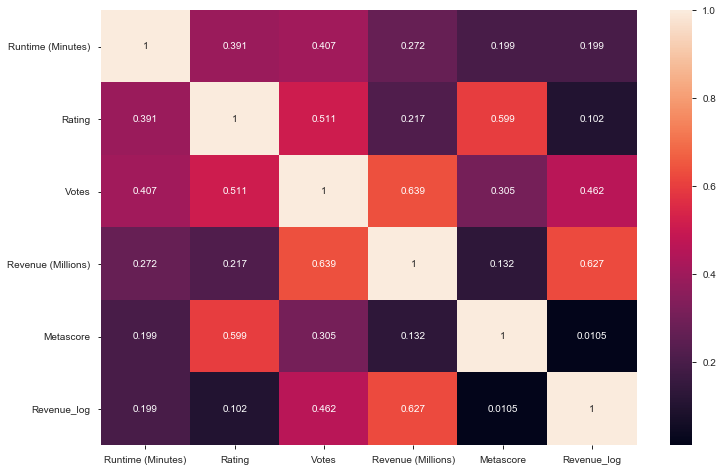

In [210]:
plt.figure(figsize = (12,8))
sns.heatmap( df.corr(), annot=True ,fmt='.3g')

- **Votes, Runtime, Rating and Metascore** all seem to be more positively related to Revenue than Revenue_log
- There seems to be no presence of multicollinearity

## Though the relationship between Revenue and explanatory variables are positive but it is not veryl strong. Except for Votes, other explanatory variables have weak relationship with the target variable which indicates that a linear regression might not be a very good approximation in this case. Non-linear models like Random Forest Regression might work better

## 7. ALGORITHMS THAT WILL BE USED

**Since, both revenue as well as log transformation of revenue do not seem to have a strong relationship with the explanatory variables, it seems linear regression is not the way forward.** 

*```However, we would apply both Linear Regression and Random Forest on revenue as well as it's log transformed structure and compare the RMSE at the end to choose the best model for future predictions```*

## 8. PREPARING DATA FOR MODELLING

### Preparing X and y

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [211]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df)
df1 = scaler.transform(df)

In [213]:
df = pd.DataFrame(df1)
df.head()

,0,1,2,3,4,5
0,0.415369,1.456553,3.111463,2.622114,0.990186,1.211248
1,0.574925,0.291544,1.673892,0.493390,0.332317,0.728437
2,0.202627,0.609274,-0.065552,0.613489,0.152898,0.772400
3,-0.276043,0.503364,-0.579948,1.975164,-0.026521,1.107107
4,0.521740,-0.555736,1.185824,2.538580,-1.162840,1.198963


In [214]:
df.columns = ['Runtime (Minutes)','Rating','Votes','Revenue (Millions)','Metascore','Revenue_log']
df.head()

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Revenue_log
0,0.415369,1.456553,3.111463,2.622114,0.990186,1.211248
1,0.574925,0.291544,1.673892,0.493390,0.332317,0.728437
2,0.202627,0.609274,-0.065552,0.613489,0.152898,0.772400
3,-0.276043,0.503364,-0.579948,1.975164,-0.026521,1.107107
4,0.521740,-0.555736,1.185824,2.538580,-1.162840,1.198963


In [275]:
#Preparing X
feature_cols = ['Rating','Votes','Metascore','Runtime (Minutes)']

X = df[feature_cols]

In [276]:
#LR_y_1 is the y variable or Target Variable for Linear Regression using Revenue(Millions)
#LR_y_2 is the y variable or Target Variable for Linear Regression using Revenue_log
#RF_y_1 is the y variable or Target Variable for Linear Regression using Revenue(Millions)
#RF_y_2 is the y variable or Target Variable for Linear Regression using Revenue_log
LR_y_1 = df['Revenue (Millions)']
LR_y_2 = df['Revenue_log']
RF_y_1 = df['Revenue (Millions)']
RF_y_2 = df['Revenue_log']

### Splitting X and y into training and test datasets

In [277]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [278]:
X_train_LR_1, X_test_LR_1, y_train_LR_1, y_test_LR_1=split(X,LR_y_1)
print('Train cases as below')
print('X_train shape: ',X_train_LR_1.shape)
print('y_train shape: ',y_train_LR_1.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_LR_1.shape)
print('y_test shape: ',y_test_LR_1.shape)

Train cases as below
X_train shape:  (799, 4)
y_train shape:  (799,)

Test cases as below
X_test shape:  (200, 4)
y_test shape:  (200,)


In [279]:
X_train_LR_2, X_test_LR_2, y_train_LR_2, y_test_LR_2=split(X,LR_y_2)
print('Train cases as below')
print('X_train shape: ',X_train_LR_2.shape)
print('y_train shape: ',y_train_LR_2.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_LR_2.shape)
print('y_test shape: ',y_test_LR_2.shape)

Train cases as below
X_train shape:  (799, 4)
y_train shape:  (799,)

Test cases as below
X_test shape:  (200, 4)
y_test shape:  (200,)


In [280]:
X_train_RF_1, X_test_RF_1, y_train_RF_1, y_test_RF_1=split(X,RF_y_1)
print('Train cases as below')
print('X_train shape: ',X_train_RF_1.shape)
print('y_train shape: ',y_train_RF_1.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_RF_1.shape)
print('y_test shape: ',y_test_RF_1.shape)

Train cases as below
X_train shape:  (799, 4)
y_train shape:  (799,)

Test cases as below
X_test shape:  (200, 4)
y_test shape:  (200,)


In [281]:
X_train_RF_2, X_test_RF_2, y_train_RF_2, y_test_RF_2=split(X,RF_y_2)
print('Train cases as below')
print('X_train shape: ',X_train_RF_2.shape)
print('y_train shape: ',y_train_RF_2.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_RF_2.shape)
print('y_test shape: ',y_test_RF_2.shape)

Train cases as below
X_train shape:  (799, 4)
y_train shape:  (799,)

Test cases as below
X_test shape:  (200, 4)
y_test shape:  (200,)


## 9. APPLYING REGRESSION TECHNIQUES

In [282]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## 9.1 LINEAR REGRESSION USING REVENUE(MILLIONS)

In [283]:
LR_1 = LinearRegression()
LR_1.fit(X_train_LR_1, y_train_LR_1)

#Prediction using train and test data
LR_1_pred_train = LR_1.predict(X_train_LR_1)
LR_1_pred_test = LR_1.predict(X_test_LR_1)


## 9.2 LINEAR REGRESSION USING REVENUE_LOG

In [284]:
LR_2 = LinearRegression()
LR_2.fit(X_train_LR_2, y_train_LR_2)

#Prediction using train and test data
LR_2_pred_train = LR_2.predict(X_train_LR_2)
LR_2_pred_test = LR_2.predict(X_test_LR_2)

## 9.3 RANDOM FOREST REGRESSION USING REVENUE(MILLIONS)

In [285]:
RF_1 = RandomForestRegressor(random_state = 0)
RF_1.fit(X_train_RF_1, y_train_RF_1)

#Prediction using train and test data
RF_1_pred_train = RF_1.predict(X_train_RF_1)
RF_1_pred_test = RF_1.predict(X_test_RF_1)

## 9.4 RANDOM FOREST REGRESSION USING REVENUE_LOG

In [286]:
RF_2 = RandomForestRegressor(random_state = 0)
RF_2.fit(X_train_RF_2, y_train_RF_2)

#Prediction using train and test data
RF_2_pred_train = RF_2.predict(X_train_RF_2)
RF_2_pred_test = RF_2.predict(X_test_RF_2)

## 10. MODEL EVALUATION 

Here we will use Root Mean Squared Error to evaluate our regression models

In [287]:
from sklearn import metrics

In [288]:
RMSE_LR1_train = np.sqrt( metrics.mean_squared_error(y_train_LR_1, LR_1_pred_train))
RMSE_LR1_test = np.sqrt( metrics.mean_squared_error(y_test_LR_1, LR_1_pred_test))
print('RMSE for train set is {}'.format(RMSE_LR1_train))
print('RMSE for test set is {}'.format(RMSE_LR1_test))

RMSE for train set is 0.7005735952142428
RMSE for test set is 0.955892839719952


In [289]:
RMSE_LR2_train = np.sqrt( metrics.mean_squared_error(y_train_LR_2, LR_2_pred_train))
RMSE_LR2_test = np.sqrt( metrics.mean_squared_error(y_test_LR_2, LR_2_pred_test))
print('RMSE for train set is {}'.format(RMSE_LR2_train))
print('RMSE for test set is {}'.format(RMSE_LR2_test))

RMSE for train set is 0.8945525942660304
RMSE for test set is 0.7641690668301979


In [290]:
RMSE_RF1_train = np.sqrt( metrics.mean_squared_error(y_train_RF_1, RF_1_pred_train))
RMSE_RF1_test = np.sqrt( metrics.mean_squared_error(y_test_RF_1, RF_1_pred_test))
print('RMSE for train set is {}'.format(RMSE_RF1_train))
print('RMSE for test set is {}'.format(RMSE_RF1_test))

RMSE for train set is 0.2976070927167303
RMSE for test set is 0.9477851139223045


In [291]:
RMSE_RF2_train = np.sqrt( metrics.mean_squared_error(y_train_RF_2, RF_2_pred_train))
RMSE_RF2_test = np.sqrt( metrics.mean_squared_error(y_test_RF_2, RF_2_pred_test))
print('RMSE for train set is {}'.format(RMSE_RF2_train))
print('RMSE for test set is {}'.format(RMSE_RF2_test))

RMSE for train set is 0.3942843524042022
RMSE for test set is 0.850633804939534


**Observations**

- We can not directly compare models with revenue and log(revenue) as target variables are different. But as we noticed above, log transformation helps in making the target variable approximately normal, hence we would consider log(revenue) model only.

- When linear regression is applied it is clear that there is a case of underfitting while with Random Forest we are overfitting the data.

- Random forest generally reduces overfitting but it happens when we can have a large number of decision trees and a large sample size. Here our sample size is quite small (999)

- In this case since Linear Regression of log model seems to have less test error than Random forest on log model we can conclude that log of Revenue seems to approximate the data well though from scatter plots we did not find a very strong correlation. 

- A few more explanatory variables which seem to influence revenue more can be collected and used for prediction which can give more accurate results

### Since Linear Regression performs best in this case, we can try to improve it more by doing some Feature selection

**Metascore** as seen from scatterplot as well as heatmap had a very weak to no relationship with Revenue_log. Let's drop Metascore and rerun the LR_2 model


## 11. FEATURE SELECTION 

In [261]:
feature_cols = ['Rating','Votes','Runtime (Minutes)']

Xnew = df[feature_cols]

LR_y_2_new = df['Revenue_log']

In [262]:
X_train_LR_2_new, X_test_LR_2_new, y_train_LR_2_new, y_test_LR_2_new=split(Xnew,LR_y_2_new)

In [264]:
LR_2_new = LinearRegression()
LR_2_new.fit(X_train_LR_2_new, y_train_LR_2_new)

#Prediction using train and test data
LR_2_pred_train_new = LR_2_new.predict(X_train_LR_2_new)
LR_2_pred_test_new = LR_2_new.predict(X_test_LR_2_new)

In [265]:
RMSE_LR2_test_new = np.sqrt( metrics.mean_squared_error(y_test_LR_2_new, LR_2_pred_test_new))
print('RMSE for test set is {}'.format(RMSE_LR2_test_new))

RMSE for test set is 0.7667659507915868


Leaving out Metascore actually increases the RMSE. So, we will not consider this model. Rather, we will consider the previous model with Metascore.

## 12. VARIABLE IMPORTANCE 

(array([0, 1, 2, 3]), <a list of 4 Text yticklabel objects>)

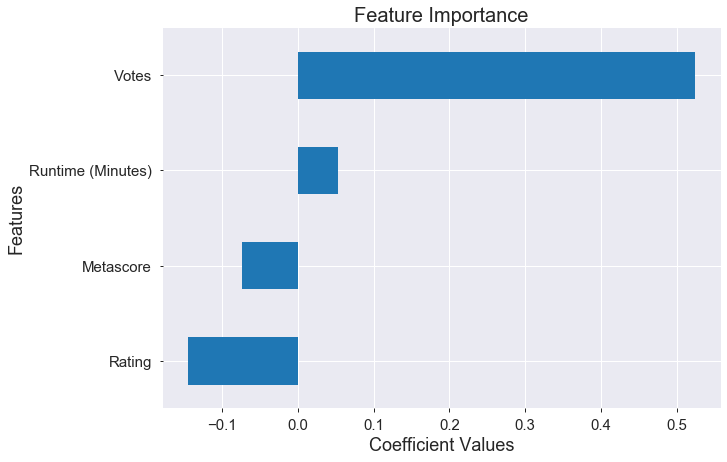

In [300]:
coef = pd.Series(LR_2.coef_, index=X.columns)
importances = coef.sort_values(ascending = True)

#plotting
importances.plot(kind = 'barh', figsize = (10,7))
plt.xlabel("Coefficient Values", size = 18)
plt.ylabel("Features", size = 18)
plt.title("Feature Importance", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

In [368]:
coef


Rating              -0.144895
Votes                0.524560
Metascore           -0.074195
Runtime (Minutes)    0.053603
dtype: float64

In [369]:
LR_2.intercept_

-0.017364015345385262

- Votes seems to be the most important feature explaining revenue generated from movies
- Rating and Metascore are more important than Runtime

## 13. PREDICTION

In [323]:
predictions = pd.DataFrame(list(LR_2.predict(X_test_LR_2)))
predictions.reset_index(inplace = True)
actuals = pd.DataFrame(y_test_LR_2)
actuals.reset_index(inplace= True)

actuals.drop('index', axis = 1, inplace = True)
predictions.drop('index', axis = 1, inplace = True)

(array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.]),
 <a list of 9 Text yticklabel objects>)

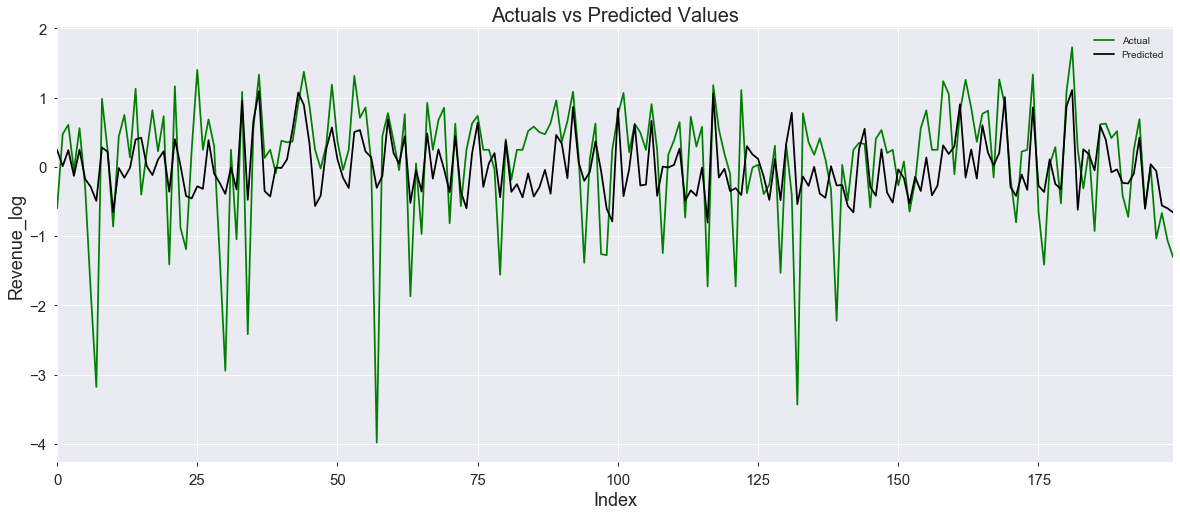

In [346]:
f,ax = plt.subplots(1,1, figsize = (20,8))
actuals.plot(kind = 'line', color = 'green', ax=ax)
predictions.plot(kind = 'line', color = 'black', ax=ax)
plt.legend({'Actual':'Revenue_log','Predicted':'0'})
plt.xlabel("Index", size = 18)
plt.ylabel("Revenue_log", size = 18)
plt.title("Actuals vs Predicted Values", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

## 14. CONCLUSION 

- Linear regression on log transformed model seems to best fit the given movies data as the test RMSE is lowest.
- Random Forest though is often known to reduce complexity and increase accuracy by fitting many decision trees, however it works best when we can fit many trees as well as the sample size is large. With 999 rows of data, it seems Random Forest is not very suitable. 
- Also, Random Forest does not work well when target variable is categorical. It works well with categorical target variables.
- Hence, in this case linear regression seems to outperform Random forest.
- However, from scatterplots and heatmap it was clear that the correlation between target and explanatory variables was not very strongly positive or negative implying assumption of linear relationship was not very accurate.
- Including more influential variables like **advertising budget** might help to explain more variation in revenue.  Also, ploynomial regression can be tried. This means that increasing complexity to some extent might be advantageous which can help to generate an optimal bias-variance trade-off.
- With the current models we are either not able to approximate accurtaley the noise in the data or we are fitting the noise and then not able to work well on the test data
- To get a trade-off we need to consider differnt models with differnt degrees of complexity